In [3]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

In [4]:
#Loading training and test dataset
train_data = pd.read_csv('/home/kusumapani/Desktop/empolis/dataset/train.csv')
test_data = pd.read_csv('/home/kusumapani/Desktop/empolis/dataset/test.csv')

# Analyzing both training and testing data for better understanding 

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
#Total number of rows and columns in training and test data
print("Number of rows in training data ", train_data.shape[0])
print("Number of columns in training data ", train_data.shape[1])
print("Number of rows in test data ", test_data.shape[0])
print("Number of columns in test data ", test_data.shape[1])

Number of rows in training data  891
Number of columns in training data  12
Number of rows in test data  418
Number of columns in test data  11


# Data Visualizing and Analysis

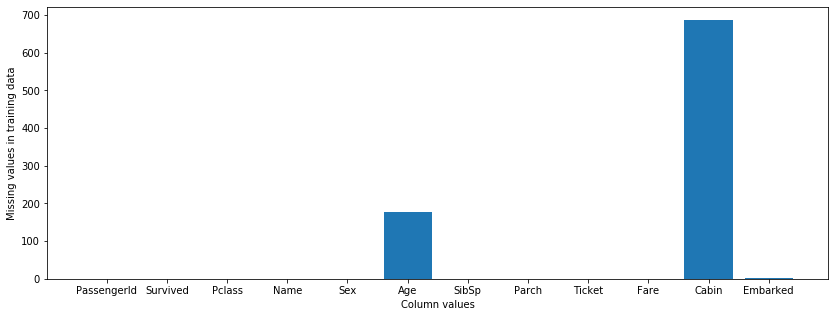

In [8]:
#Visualizing number of null values in training data 
plt.figure(figsize = (14,5))
plt.bar(train_data.columns, train_data.isna().sum())
plt.xlabel("Column values")
plt.ylabel("Missing values in training data")
plt.show()
#From the plot we can see that in training data Age, Cabin and Embarked contains missing values

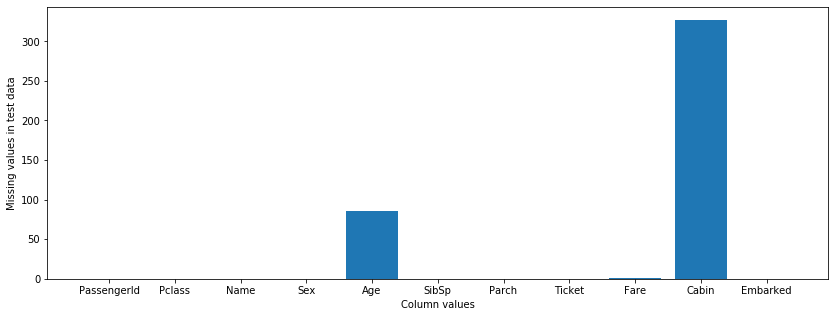

In [9]:
#Visualizing number of null values in test data
plt.figure(figsize = (14,5))
plt.bar(test_data.columns, test_data.isnull().sum().values)
plt.xlabel("Column values")
plt.ylabel("Missing values in test data")
plt.show()
##From the plot we can see that in test data Age, Fare and Cabin contains missing values

[]

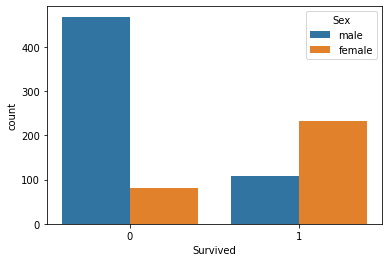

In [10]:
#Distribution of plot for male and female survivors
sns.countplot('Survived', hue = 'Sex', data = train_data)
plt.plot()


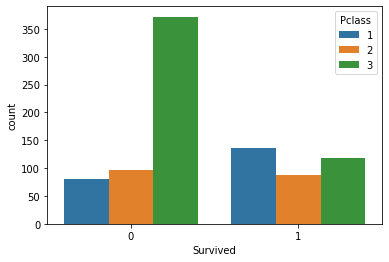

In [11]:
#Plot to see if pclass affects the survival rate
sns.countplot("Survived", hue = 'Pclass', data = train_data)
plt.show()
# this graph clearly show that people in third class are more likely to die 

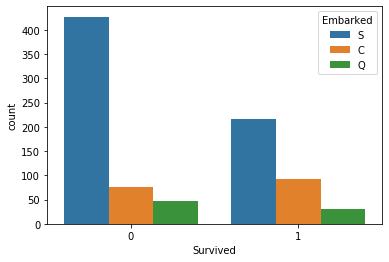

In [12]:
# Ploting survival graph based on emarked feature
sns.countplot('Survived', hue = 'Embarked', data = train_data)
plt.show()
#plot shows higer death rate for passengers who where embarked in Southampton 

# Data Cleaning

In [13]:
'''As we have seen from the missing values plot, more than 80% of 
the cabin feature is missing and is of no use for our traing. Similarly 
dropping feature not required to prepare training data'''

train_labels = train_data['Survived']
train_data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)
#copying the passenger infor for final submission
test_sub = test_data['PassengerId']
test_data.drop([ 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)


In [14]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [15]:
train_labels

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [16]:
#Covnerting categorical values to numerical using map function for training purpose

train_data['Sex'] = train_data.Sex.map({"male":1, "female":0})

train_data['Embarked'] = train_data.Embarked.map({"C":0, "Q":1, "S" :2})


test_data['Sex'] = test_data.Sex.map({"male":0, "female":1})

test_data['Embarked'] = test_data.Embarked.map({"C":0, "Q":1, "S" :2})

In [17]:
train_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2.0
1,1,0,38.0,1,0,71.2833,0.0
2,3,0,26.0,0,0,7.9250,2.0
3,1,0,35.0,1,0,53.1000,2.0
4,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,2.0
887,1,0,19.0,0,0,30.0000,2.0
888,3,0,NaN,1,2,23.4500,2.0
889,1,1,26.0,0,0,30.0000,0.0


In [18]:
# Check for missing values

for col in train_data.columns: 
    print(col , ":" , train_data[col].isnull().sum())

Pclass : 0
Sex : 0
Age : 177
SibSp : 0
Parch : 0
Fare : 0
Embarked : 2


In [19]:
# Handling missing values by replacing missing values with median of that column values
    
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())

train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].median())

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())

test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())


In [20]:
for col in train_data.columns: 
    print(col , ":" , train_data[col].isnull().sum())

#We can see that now that there is no missing values in the training data

Pclass : 0
Sex : 0
Age : 0
SibSp : 0
Parch : 0
Fare : 0
Embarked : 0


In [21]:
#checking for outliers using IQR(Inter-Quartile-Range) method and updaing the outlier data accordingly

out=['Age','Fare']
df = train_data
for i in out:
    q25,q75=np.percentile(df[i],[25,75])
    iqr=q75-q25
    minimum=q25-(iqr*3)
    maximum=q75+(iqr*3)
#assigning nan to the outliers
    df[i].iloc[df[df[i]<minimum].index]=np.nan
    df[i].iloc[df[df[i]>maximum].index]=np.nan
#imputing nan values
df['Age']=df.Age.fillna(df.Age.median())
df['Fare']=df.Fare.fillna(df.Fare.median())

/home/kusumapani/.local/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


# Data Modeling

In [39]:
trainData , valData, trainLabels, valLabels = (train_test_split(train_data, train_labels,train_size=0.70))
trainData_AO , valData_AO, trainLabels_AO, valLabels_AO = (train_test_split(df, train_labels,train_size=0.70))

In [40]:
decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
model = decision_tree.fit(trainData, trainLabels)
model_AO = decision_tree.fit(trainData_AO, trainLabels_AO)
accuracy = model.score(valData, valLabels) * 100
accuracy_after_outlier = model.score(valData_AO, valLabels_AO) * 100
print("Accuracy before and after outlier removal \nBefore:", accuracy , "\nAfter:", accuracy_after_outlier)

Accuracy before and after outlier removal 
Before: 81.34328358208955 
After: 84.32835820895522


In [41]:
accucy = model.score(trainData_AO, trainLabels_AO) * 100
accucy

81.38041733547352

In [33]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
RF = random_forest.fit(trainData, trainLabels)
RF_accuracy = random_forest.score(valData, valLabels) * 100
RF_accuracy

85.44776119402985

In [ ]:
pred = model.predict(test_data)
pred = pred.astype(int)
pred

In [ ]:
Final = pd.DataFrame({"PassengerId":test_data, 'Survived':pred})
Final.to_csv("/home/kusumapani/Desktop/empolis/Soultions_CSV/titanic_output.csv",index = False)